# Image Classification using OpenCV and MobileNet
### It uses MobileNet Single Shot Detector

When it comes to deep learning-based object detection there are three primary object detection methods that you’ll likely encounter:

<li>Faster R-CNNs (Girshick et al., 2015)</li>
<li>You Only Look Once (YOLO) (Redmon and Farhadi, 2015)</li>
<li>Single Shot Detectors (SSDs) (Liu et al., 2015)</li>


We call these networks “MobileNets” because they are designed for resource constrained devices such as your smartphone. MobileNets differ from traditional CNNs through the usage of depthwise separable convolution 

The model we’ll be using in this  is a Caffe version of the original TensorFlow implementation by Howard et al. and was trained by chuanqi305 (see GitHub https://github.com/chuanqi305/MobileNet-SSD ).

The MobileNet SSD was first trained on the COCO dataset (Common Objects in Context) and was then fine-tuned on PASCAL VOC reaching 72.7% mAP (mean average precision).

We can therefore detect 20 objects in images (+1 for the background class), including airplanes, bicycles, birds, boats, bottles, buses, cars, cats, chairs, cows, dining tables, dogs, horses, motorbikes, people, potted plants, sheep, sofas, trains, and tv monitors.

In [9]:
# import the necessary packages
%matplotlib inline
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['figure.figsize'] = (14,6)

In [10]:
# load the input image from disk
image = cv2.imread("images/horse.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
# initialize the list of class labels MobileNet SSD was trained to detect, 
# then generate a set of bounding box colors for each class
classes = ["background", "aeroplane", "bicycle", "bird", "boat",
"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
"sofa", "train", "tvmonitor"]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [12]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('model/MobileNetSSD_deploy.prototxt', 'model/MobileNetSSD_deploy.caffemodel')

[INFO] loading model...


In [13]:
# construct an input blob for the image by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD implementation)

(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,(300, 300), 127.5)

In [14]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [15]:
#set the confidence threshold
confidence_threshold = 0.6
# loop over the detections
for i in np.arange(0, detections.shape[2]):
# extract the confidence (i.e., probability) associated with the
# prediction
    confidence = detections[0, 0, i, 2]
 
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > confidence_threshold:
        # extract the index of the class label from the `detections`,
        # then compute the (x, y)-coordinates of the bounding box for the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # display the prediction
        label = "{}: {:.2f}%".format(classes[idx], confidence * 100)
        print("[INFO] {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY), colors[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)

[INFO] car: 99.46%
[INFO] dog: 68.11%
[INFO] horse: 99.93%
[INFO] person: 87.31%


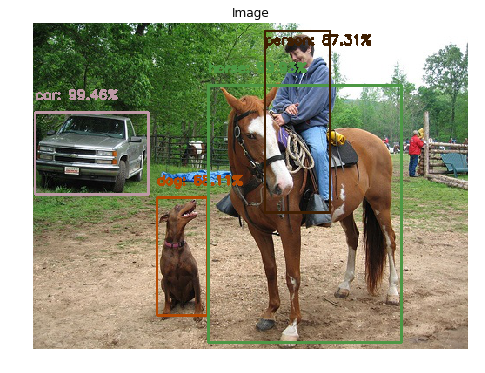

In [16]:
# display the output image
plt.title('Image'),plt.axis("Off")
plt.imshow(image)